In [21]:
from matplotlib import pyplot as plt

## 实现增加阴影、破裂效果饼图

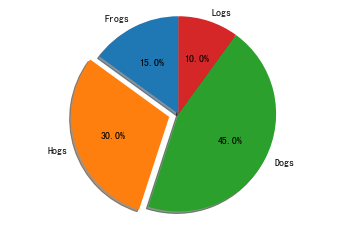

In [19]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15,30,45,10]
explode = (0,0.1,0,0)

fig1,ax1 = plt.subplots()
# print(dir(ax1.pie))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal');

## 实现K线图绘制

In [32]:
from matplotlib import finance
matplotlib.finance.candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r')

# 数据的获取和处理
data = pd.read_hdf("./data/stock_plot/day_open.h5")[:100]
data1 = pd.read_hdf("./data/stock_plot/day_close.h5")[:100]
data2 = pd.read_hdf("./data/stock_plot/day_high.h5")[:100]
data3 = pd.read_hdf("./data/stock_plot/day_low.h5")[:100]

day = pd.concat([data["000001.SZ"], data1["000001.SZ"], data2["000001.SZ"],
data3["000001.SZ"]], axis=1)

day.columns = ["open", "close", "high", "low"]
day = day.reset_index().values

# 画图
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 8), dpi=80)
# 第一个参数axes
candlestick_ochl(axes, day, width=0.2, colorup='r', colordown='g')
plt.show()

## matplotlib绘制动画

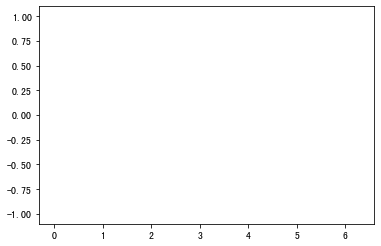

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

# 设置x,y数据，显示到图形当中
x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():
    """
    初始设置
    """
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    """
    更新坐标点函数
    """
    line.set_ydata(np.sin(x + i / 100))
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

plt.show()